In [1]:
pip install pandas matplotlib seaborn scikit-learn plotly


Note: you may need to restart the kernel to use updated packages.


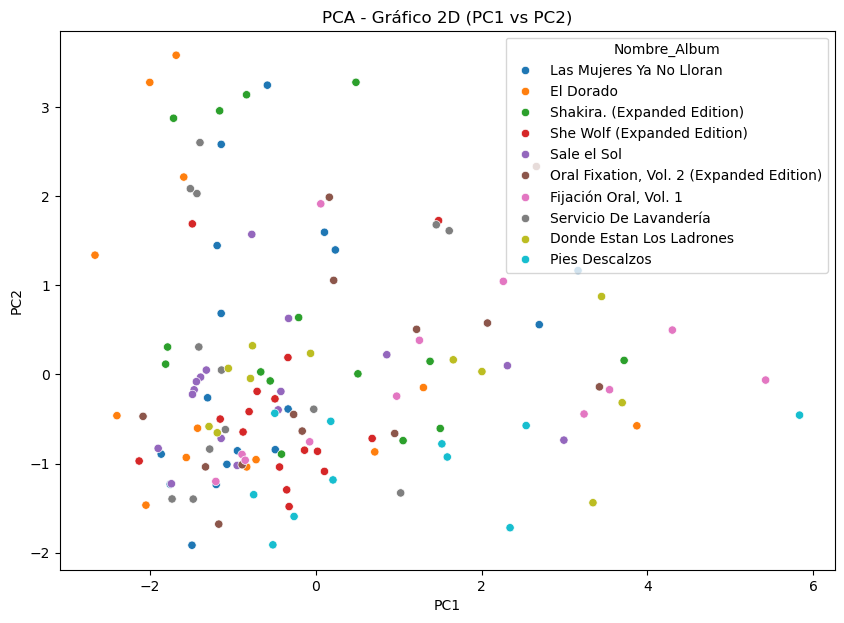

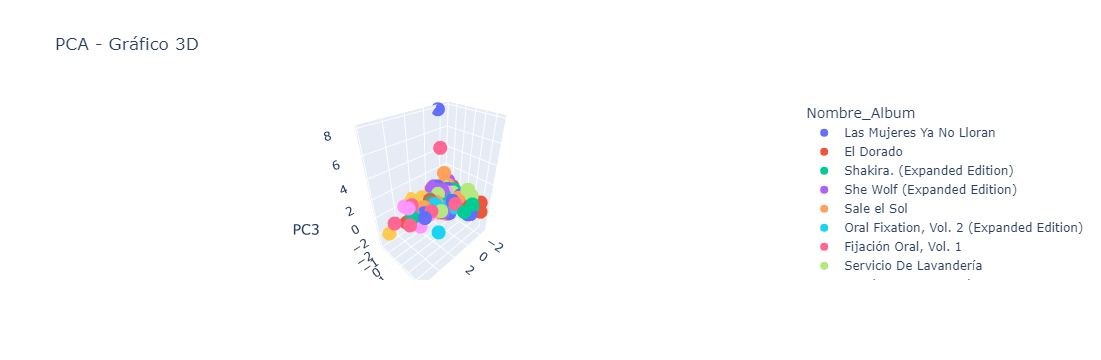

NameError: name 'np' is not defined

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar las columnas numéricas para PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Aplicar PCA
pca = PCA(n_components=3)  # Para gráficos 3D
pca_components = pca.fit_transform(scaled_data)

# Convertir los resultados a un DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Nombre_Album'] = data['Nombre_Album']  # Agregar la variable cualitativa si es necesario

# Gráfico 2D (PC1 vs PC2)
plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC2', hue='Nombre_Album', data=pca_df, palette='tab10')
plt.title('PCA - Gráfico 2D (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Gráfico 3D (PC1 vs PC2 vs PC3)
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Nombre_Album', title='PCA - Gráfico 3D')
fig.show()

# Biplot (Solo para 2 componentes principales)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Nombre_Album'], palette='tab10')

for i, feature in enumerate(numerical_data.columns):
    plt.arrow(0, 0, loadings[i, 0]*10, loadings[i, 1]*10, color='r', alpha=0.5)
    plt.text(loadings[i, 0]*12, loadings[i, 1]*12, feature, color='g', ha='center', va='center')

plt.title('PCA - Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


In [7]:
pip install pandas seaborn matplotlib scipy


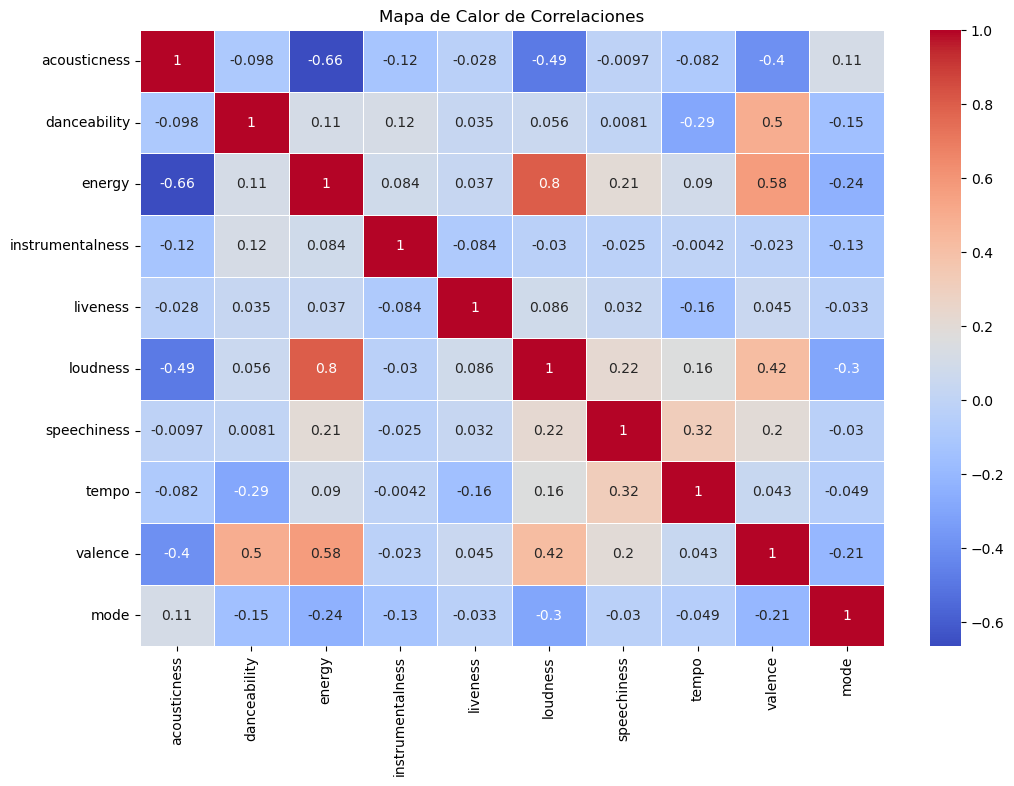

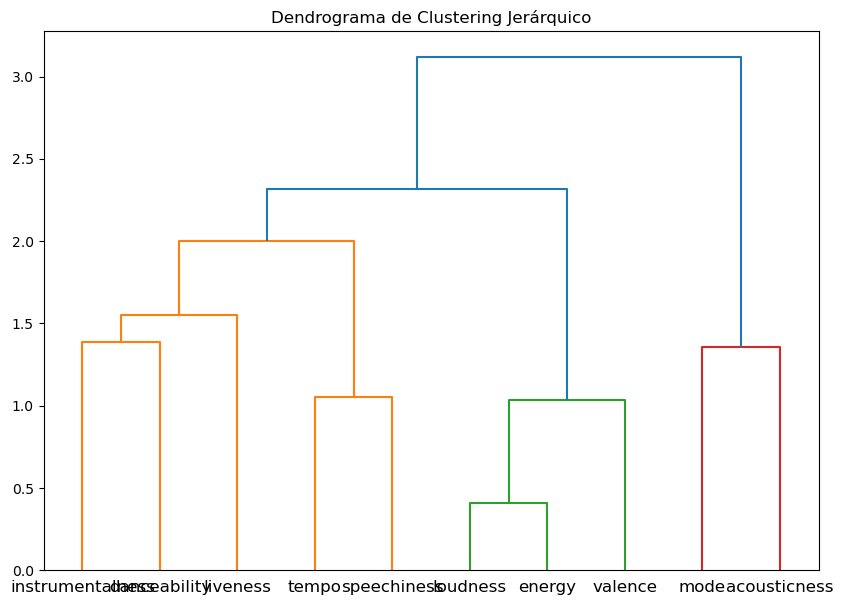

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar las columnas numéricas para el análisis de correlación
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Clustering Jerárquico y Dendrograma
# Utilizar linkage para crear una matriz de distancias y dendrograma
linked = linkage(correlation_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=correlation_matrix.columns,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()


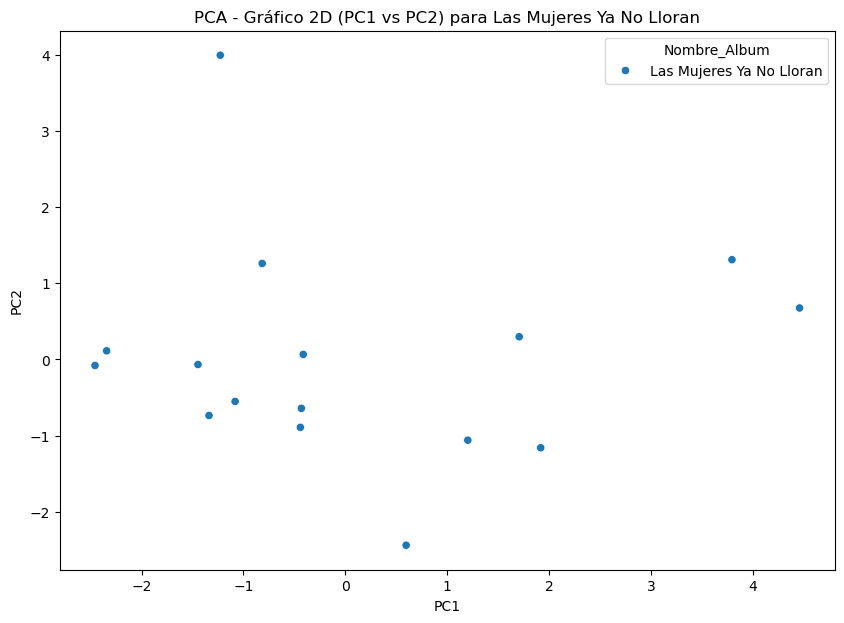

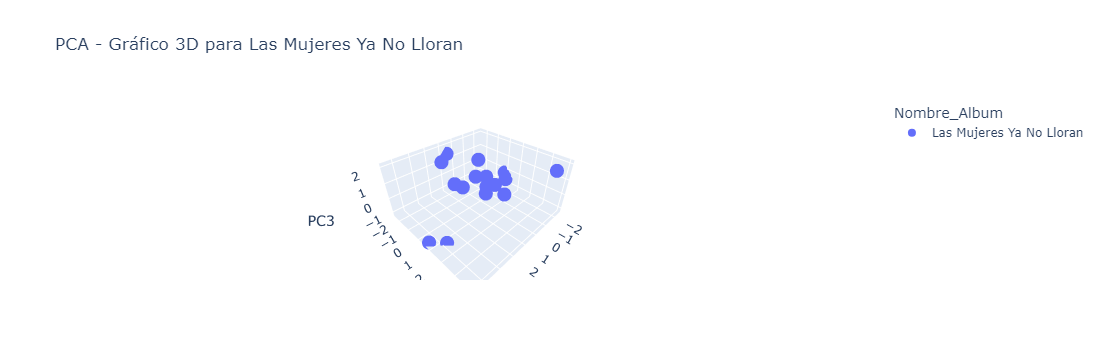

NameError: name 'np' is not defined

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar por nombre de álbum
nombre_album = "Las Mujeres Ya No Lloran"  # Cambia esto por el nombre del álbum que deseas filtrar
filtered_data = data[data['Nombre_Album'] == nombre_album]

# Filtrar las columnas numéricas para PCA
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Aplicar PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Convertir los resultados a un DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Nombre_Album'] = filtered_data['Nombre_Album']

# Gráfico 2D (PC1 vs PC2)
plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC2', hue='Nombre_Album', data=pca_df, palette='tab10')
plt.title(f'PCA - Gráfico 2D (PC1 vs PC2) para {nombre_album}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Gráfico 3D (PC1 vs PC2 vs PC3)
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Nombre_Album', title=f'PCA - Gráfico 3D para {nombre_album}')
fig.show()

# Biplot (Solo para 2 componentes principales)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Nombre_Album'], palette='tab10')

for i, feature in enumerate(numerical_data.columns):
    plt.arrow(0, 0, loadings[i, 0]*10, loadings[i, 1]*10, color='r', alpha=0.5)
    plt.text(loadings[i, 0]*12, loadings[i, 1]*12, feature, color='g', ha='center', va='center')

plt.title(f'PCA - Biplot para {nombre_album}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


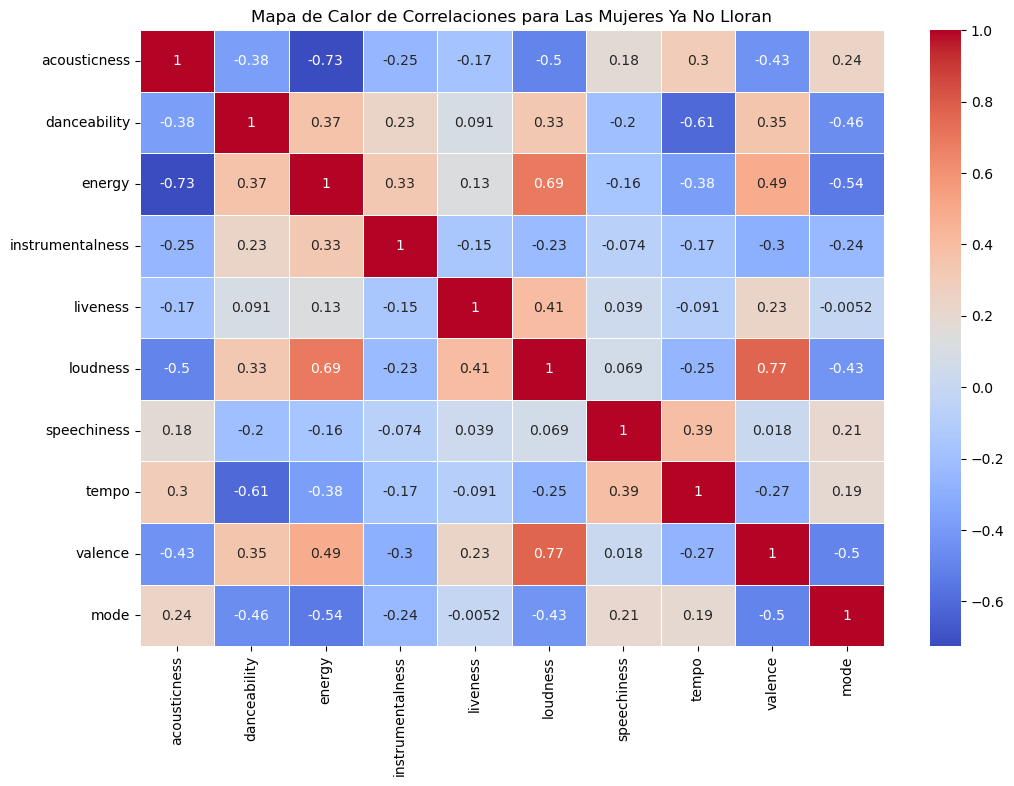

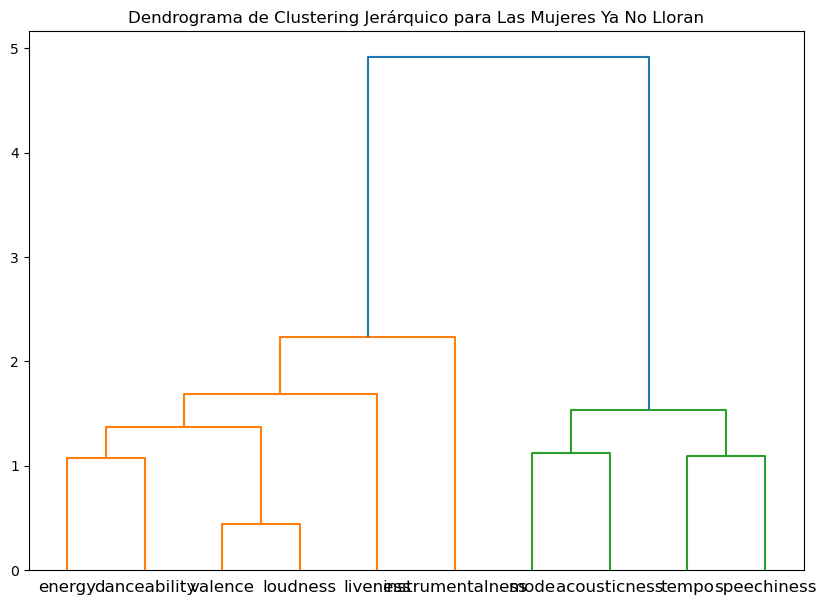

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar por nombre de álbum
nombre_album = "Las Mujeres Ya No Lloran"  # Cambia esto por el nombre del álbum que deseas filtrar
filtered_data = data[data['Nombre_Album'] == nombre_album]

# Filtrar las columnas numéricas para el análisis de correlación
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Mapa de Calor de Correlaciones para {nombre_album}')
plt.show()

# Clustering Jerárquico y Dendrograma
linked = linkage(correlation_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=correlation_matrix.columns,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title(f'Dendrograma de Clustering Jerárquico para {nombre_album}')
plt.show()


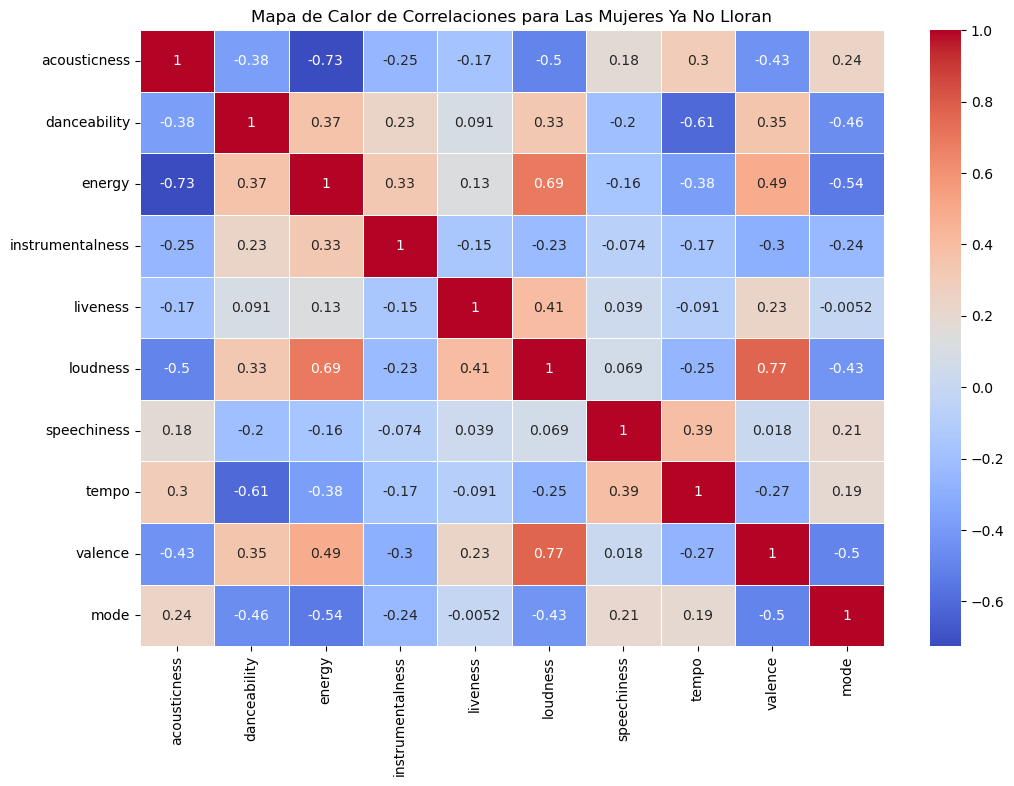

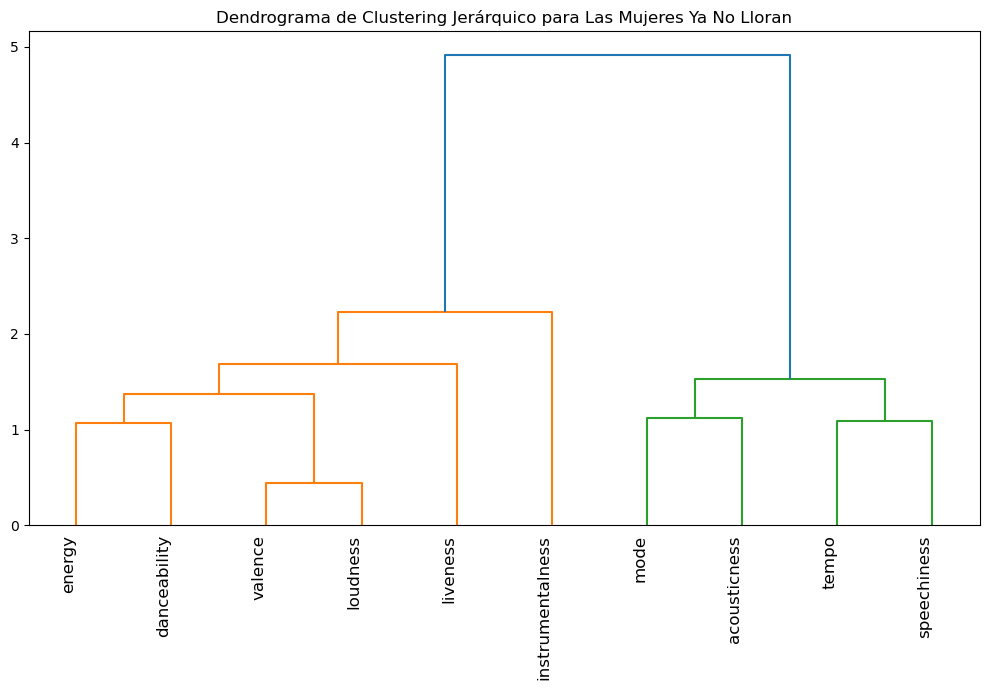

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar por nombre de álbum
nombre_album = "Las Mujeres Ya No Lloran"  # Cambia esto por el nombre del álbum que deseas filtrar
filtered_data = data[data['Nombre_Album'] == nombre_album]

# Filtrar las columnas numéricas para el análisis de correlación
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Mapa de Calor de Correlaciones para {nombre_album}')
plt.show()

# Clustering Jerárquico y Dendrograma
linked = linkage(correlation_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=correlation_matrix.columns,
           distance_sort='descending',
           show_leaf_counts=True)

# Rotar etiquetas y ajustar espaciado
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas 90 grados
plt.title(f'Dendrograma de Clustering Jerárquico para {nombre_album}')
plt.tight_layout()  # Ajustar layout para que las etiquetas no se corten
plt.show()


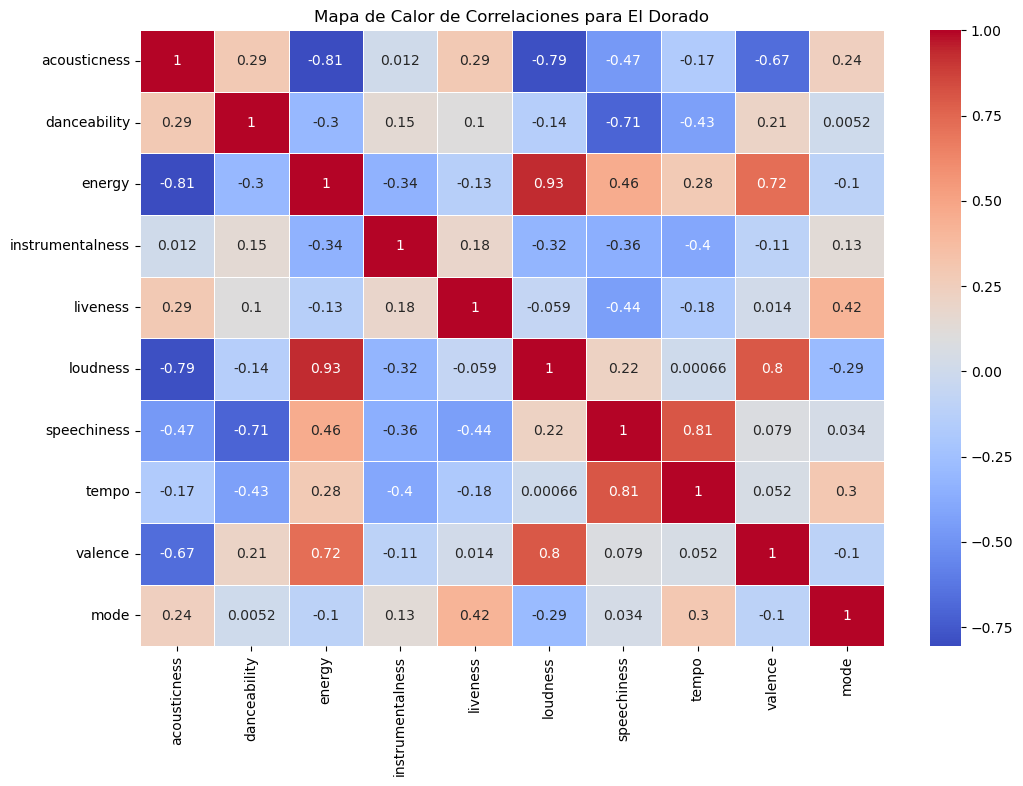

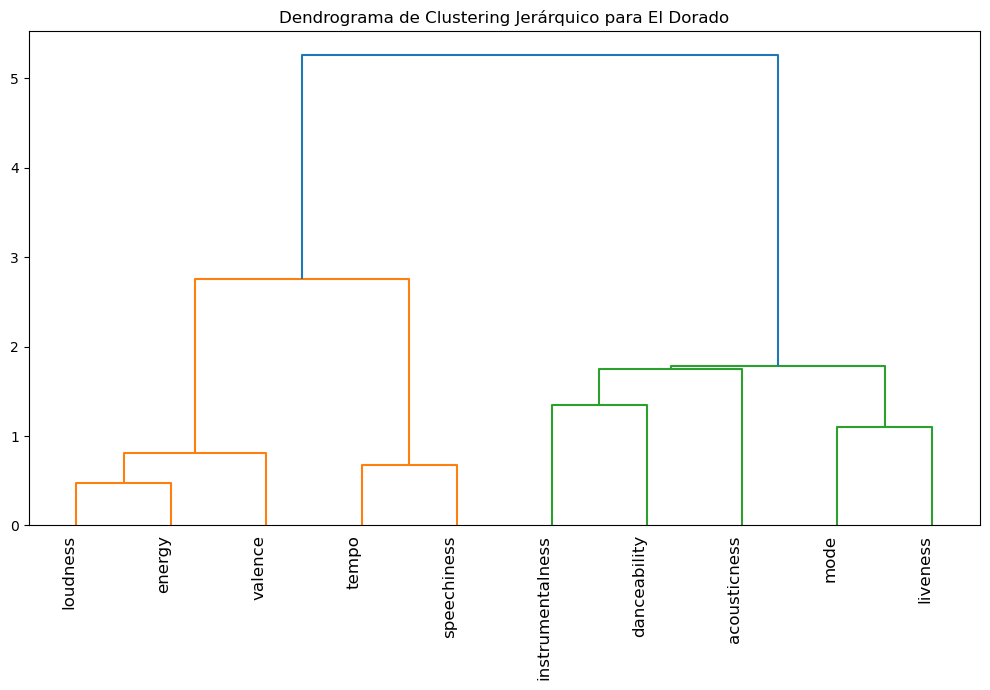

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar por nombre de álbum
nombre_album = "El Dorado"  # Cambia esto por el nombre del álbum que deseas filtrar
filtered_data = data[data['Nombre_Album'] == nombre_album]

# Filtrar las columnas numéricas para el análisis de correlación
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Mapa de Calor de Correlaciones para {nombre_album}')
plt.show()

# Clustering Jerárquico y Dendrograma
linked = linkage(correlation_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=correlation_matrix.columns,
           distance_sort='descending',
           show_leaf_counts=True)

# Rotar etiquetas y ajustar espaciado
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas 90 grados
plt.title(f'Dendrograma de Clustering Jerárquico para {nombre_album}')
plt.tight_layout()  # Ajustar layout para que las etiquetas no se corten
plt.show()


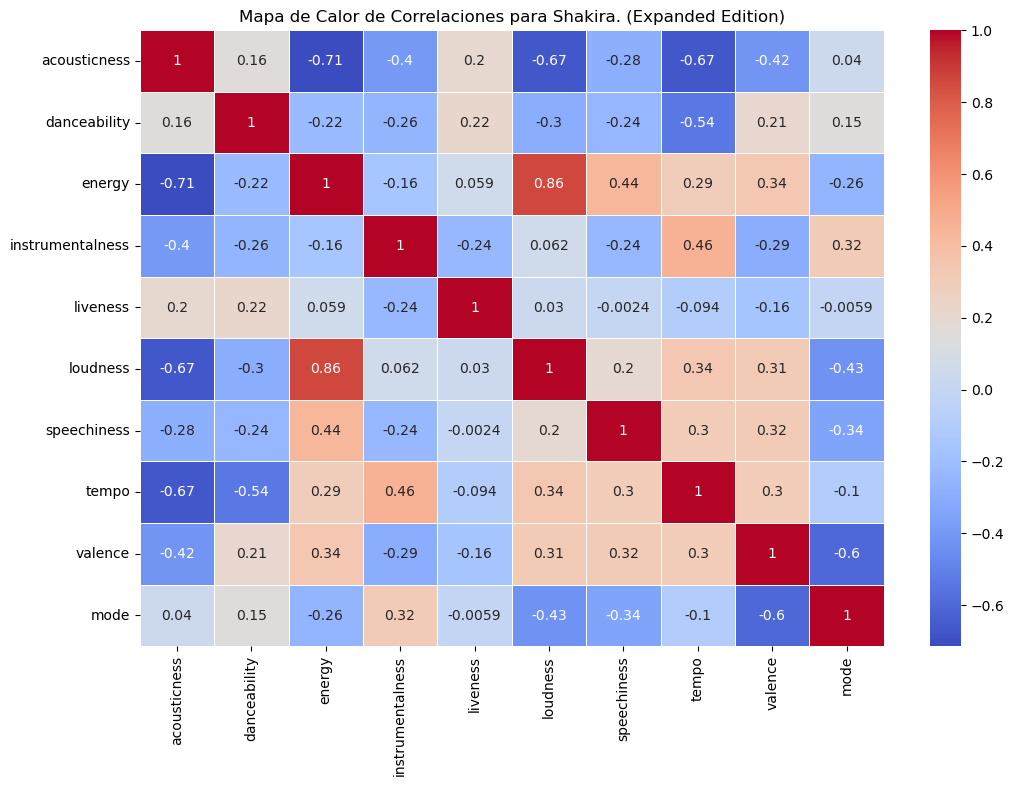

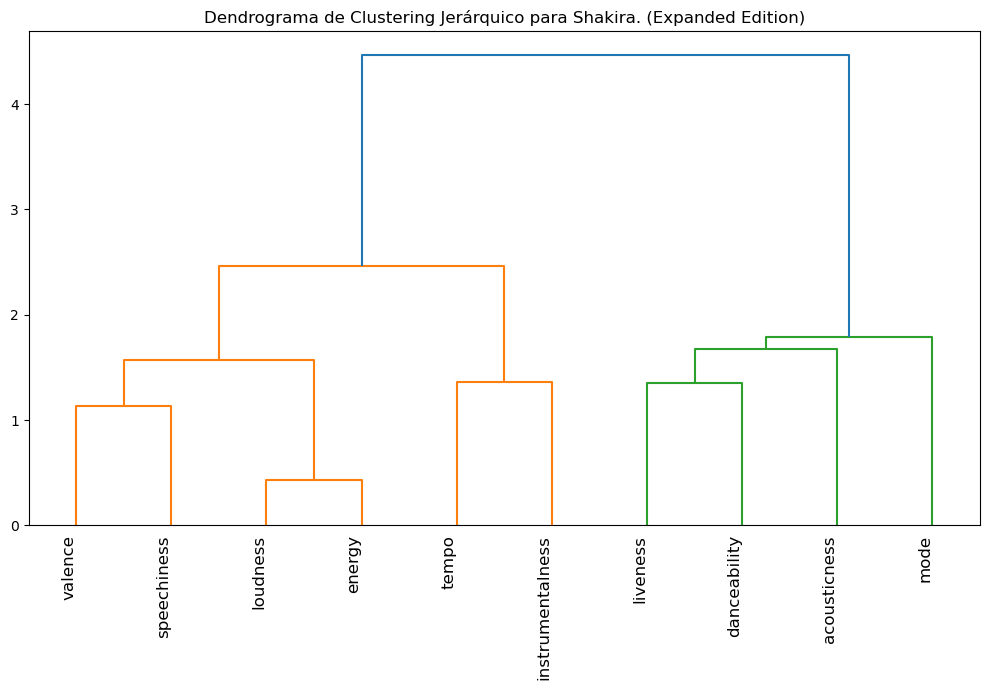

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar por nombre de álbum
nombre_album = "Shakira. (Expanded Edition)"  # Cambia esto por el nombre del álbum que deseas filtrar
filtered_data = data[data['Nombre_Album'] == nombre_album]

# Filtrar las columnas numéricas para el análisis de correlación
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Mapa de Calor de Correlaciones para {nombre_album}')
plt.show()

# Clustering Jerárquico y Dendrograma
linked = linkage(correlation_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=correlation_matrix.columns,
           distance_sort='descending',
           show_leaf_counts=True)

# Rotar etiquetas y ajustar espaciado
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas 90 grados
plt.title(f'Dendrograma de Clustering Jerárquico para {nombre_album}')
plt.tight_layout()  # Ajustar layout para que las etiquetas no se corten
plt.show()

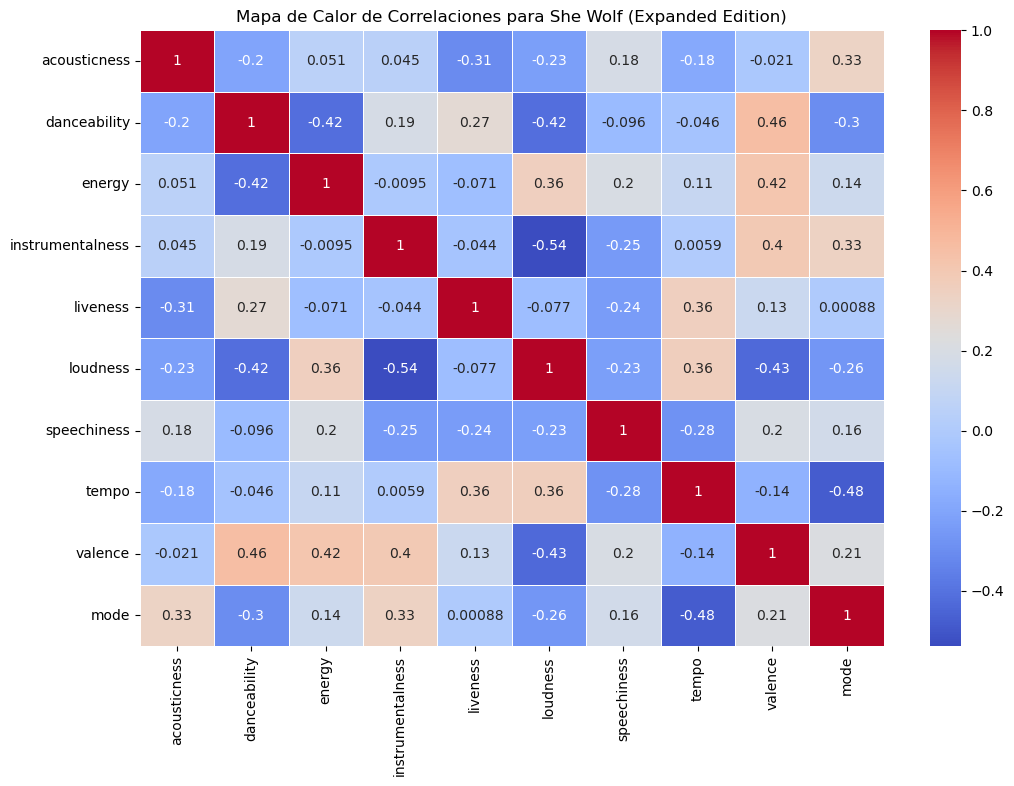

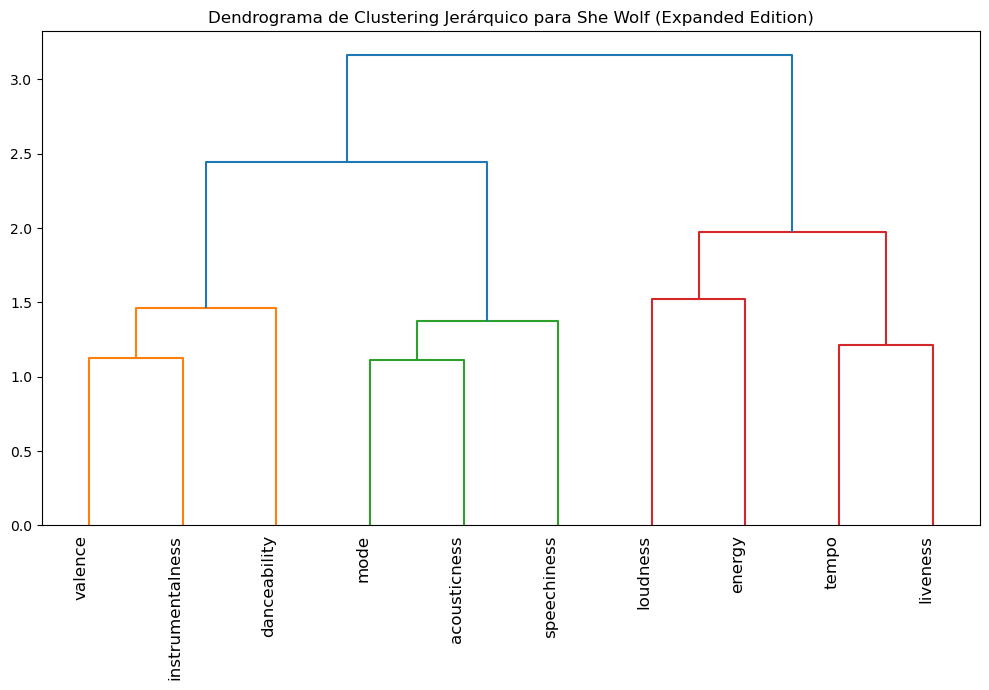

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar por nombre de álbum
nombre_album = "She Wolf (Expanded Edition)"  # Cambia esto por el nombre del álbum que deseas filtrar
filtered_data = data[data['Nombre_Album'] == nombre_album]

# Filtrar las columnas numéricas para el análisis de correlación
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Mapa de Calor de Correlaciones para {nombre_album}')
plt.show()

# Clustering Jerárquico y Dendrograma
linked = linkage(correlation_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=correlation_matrix.columns,
           distance_sort='descending',
           show_leaf_counts=True)

# Rotar etiquetas y ajustar espaciado
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas 90 grados
plt.title(f'Dendrograma de Clustering Jerárquico para {nombre_album}')
plt.tight_layout()  # Ajustar layout para que las etiquetas no se corten
plt.show()

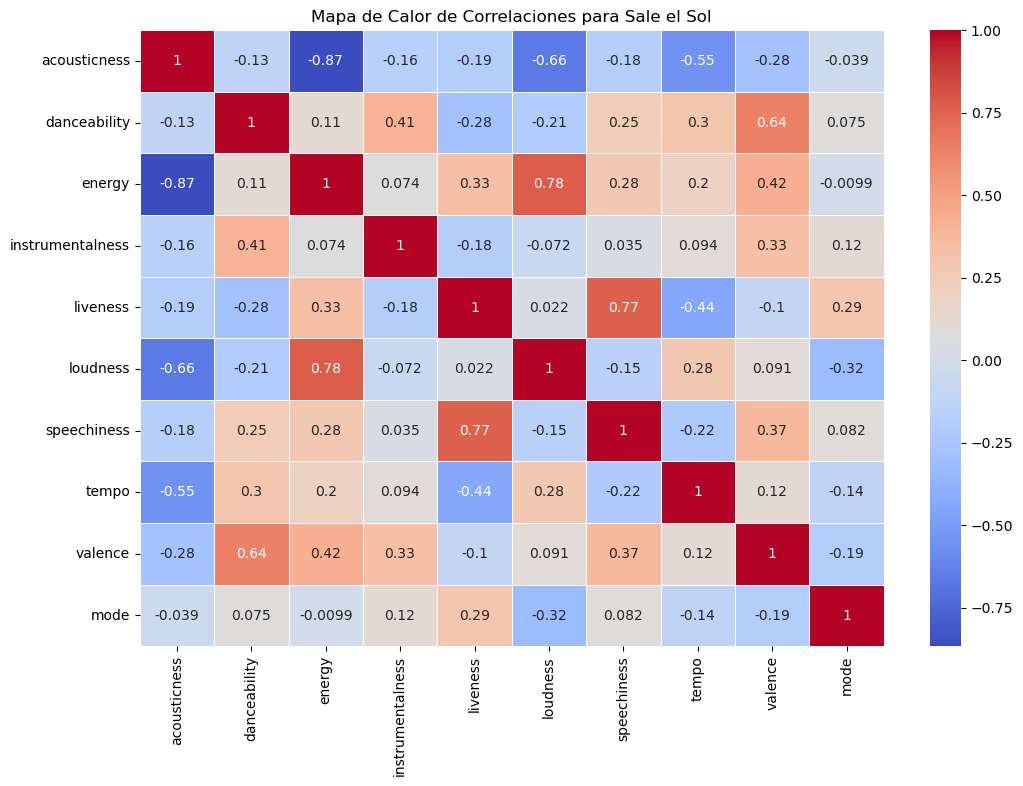

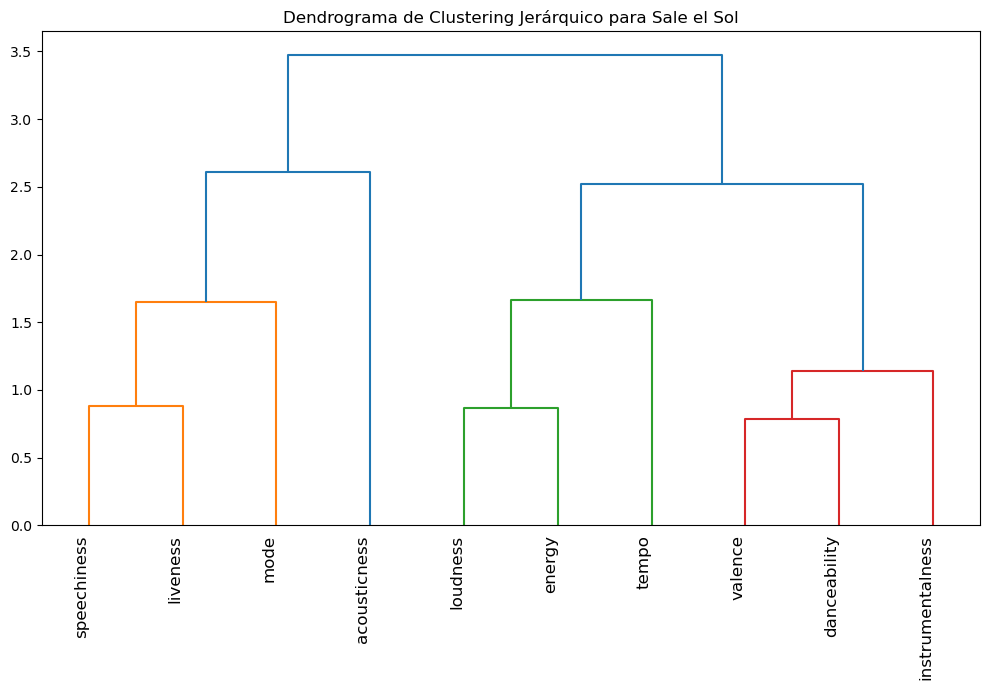

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar por nombre de álbum
nombre_album = "Sale el Sol"  # Cambia esto por el nombre del álbum que deseas filtrar
filtered_data = data[data['Nombre_Album'] == nombre_album]

# Filtrar las columnas numéricas para el análisis de correlación
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Mapa de Calor de Correlaciones para {nombre_album}')
plt.show()

# Clustering Jerárquico y Dendrograma
linked = linkage(correlation_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=correlation_matrix.columns,
           distance_sort='descending',
           show_leaf_counts=True)

# Rotar etiquetas y ajustar espaciado
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas 90 grados
plt.title(f'Dendrograma de Clustering Jerárquico para {nombre_album}')
plt.tight_layout()  # Ajustar layout para que las etiquetas no se corten
plt.show()

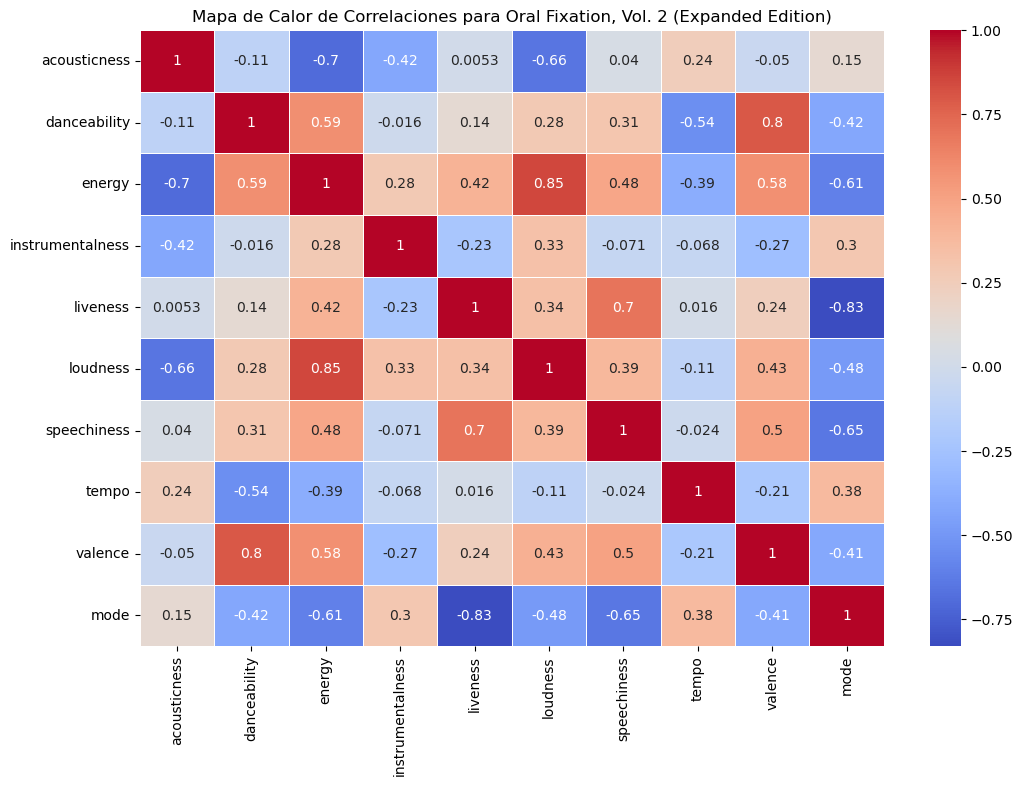

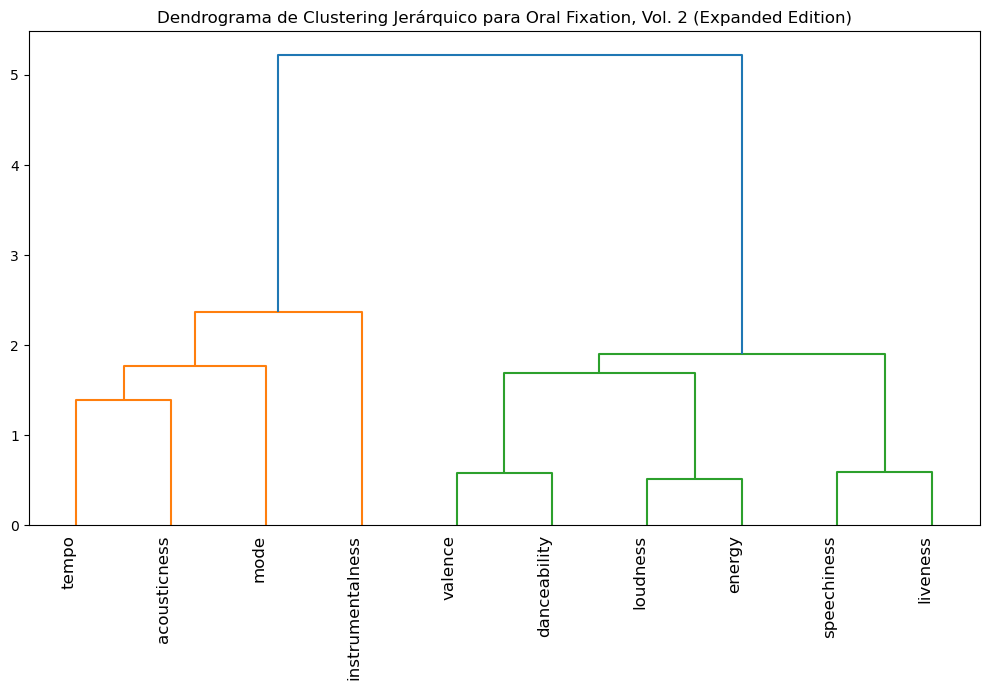

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos
file_path = 'data3.xlsx'
data = pd.read_excel(file_path)

# Filtrar por nombre de álbum
nombre_album = "Oral Fixation, Vol. 2 (Expanded Edition)"  # Cambia esto por el nombre del álbum que deseas filtrar
filtered_data = data[data['Nombre_Album'] == nombre_album]

# Filtrar las columnas numéricas para el análisis de correlación
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Crear el Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Mapa de Calor de Correlaciones para {nombre_album}')
plt.show()

# Clustering Jerárquico y Dendrograma
linked = linkage(correlation_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=correlation_matrix.columns,
           distance_sort='descending',
           show_leaf_counts=True)

# Rotar etiquetas y ajustar espaciado
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas 90 grados
plt.title(f'Dendrograma de Clustering Jerárquico para {nombre_album}')
plt.tight_layout()  # Ajustar layout para que las etiquetas no se corten
plt.show()